In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2056192/2110848 [============================>.] - ETA: 0s

In [6]:
import numpy as np

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = i
    return results

In [23]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
from keras.utils.np_utils import to_categorical

In [10]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [16]:
from keras import layers
from keras import models

In [33]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [34]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [40]:
history = model.fit(x_train,
                    one_hot_train_labels,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_test, one_hot_test_labels))

Train on 8982 samples, validate on 2246 samples
Epoch 1/9
8982/8982 [==============================] - 5s - loss: 7.5174 - acc: 0.5324 - val_loss: 7.5298 - val_acc: 0.5294
Epoch 2/9
8982/8982 [==============================] - 3s - loss: 7.5375 - acc: 0.5316 - val_loss: 7.5001 - val_acc: 0.5316
Epoch 3/9
8982/8982 [==============================] - 3s - loss: 7.6966 - acc: 0.5218 - val_loss: 7.5635 - val_acc: 0.5258
Epoch 4/9
8982/8982 [==============================] - 4s - loss: 7.5869 - acc: 0.5288 - val_loss: 7.4724 - val_acc: 0.5325
Epoch 5/9
8982/8982 [==============================] - 2s - loss: 7.4870 - acc: 0.5353 - val_loss: 7.4398 - val_acc: 0.5365
Epoch 6/9
8982/8982 [==============================] - 2s - loss: 7.3759 - acc: 0.5420 - val_loss: 7.0858 - val_acc: 0.5543
Epoch 7/9
8982/8982 [==============================] - 2s - loss: 7.6036 - acc: 0.5272 - val_loss: 7.9527 - val_acc: 0.5031
Epoch 8/9
8982/8982 [==============================] - 2s - loss: 7.9333 - acc: 0.50

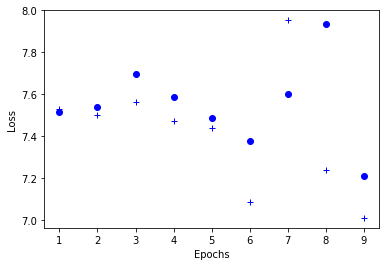

In [41]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

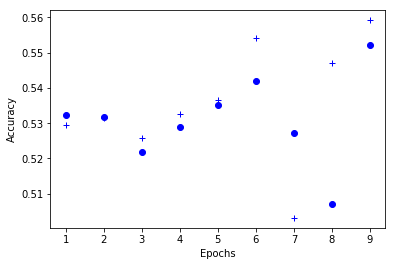

In [42]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [43]:
model.evaluate(x_test, one_hot_test_labels)

2144/2246 [===========================>..] - ETA: 0s

[7.0113584258571224, 0.55921638468388246]